In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [23]:
x_data = np.linspace(0,10,1000000)
noise = np.random.randn(len(x_data))

y = mx + b where b = 5 and m = 0.5 and we want to add the noise aswell

In [24]:
y_true = (0.5 * x_data)+ 5 +noise

In [25]:
x_df = pd.DataFrame(data = x_data,columns = ["X_data"])
y_df = pd.DataFrame(data = y_true, columns = ["Y"])

In [26]:
data = pd.concat([x_df,y_df],axis = 1)

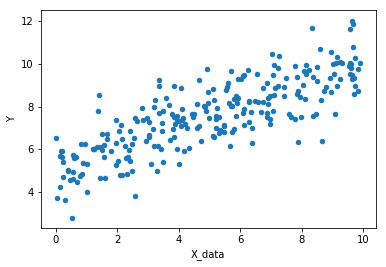

In [27]:
data.sample(250).plot(kind = "scatter",x ="X_data", y = "Y")

In [32]:
batch_size = 8
m = tf.Variable(0.3)
b = tf.Variable(0.8)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m*xph +b
error = tf.reduce_sum(tf.square(yph-y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    #create random index
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m,model_b = sess.run([m,b])

In [38]:
model_m

0.52719074

In [39]:
model_b

4.989459